

# Project: Investigate Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Exploring statistics behind movie data. Process involved reviewing data, cleaning data, graphing the data, and analyzing meaningful conclusions. 

### Questions
1. What are the most popular genres 
2. What are the most profitable movies
3. What were the most expensive movies to create?
4. Is there a relationship between profit and popularity?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section I load the data and view its intricacies.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Uploading data and viewing the first few rows

In [3]:
df.shape

(10866, 21)

amount of rows and columns 

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


meaningful statistics per category

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

meaningful info on date

In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Number of null values per category 

### Data Cleaning 

In [7]:
df.drop(['id','imdb_id','cast','homepage','director','tagline','keywords','overview','budget','revenue','production_companies','release_date','vote_count'], axis=1, inplace=True)

Drop irrelivant categories

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

Dropped the one duplicated set of data

In [11]:
df.drop(df[(df.budget_adj == 0)].index, inplace=True)

In [12]:
df.dropna(inplace=True, subset=['genres'])

In [13]:
df.isna().sum()

popularity        0
original_title    0
runtime           0
genres            0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

Verify there was no null data 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5168 entries, 0 to 10865
Data columns (total 8 columns):
popularity        5168 non-null float64
original_title    5168 non-null object
runtime           5168 non-null int64
genres            5168 non-null object
vote_average      5168 non-null float64
release_year      5168 non-null int64
budget_adj        5168 non-null float64
revenue_adj       5168 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 363.4+ KB


View info for cleaned data set

In [15]:
df.insert(1,'profit',df['revenue_adj']-df['budget_adj'])

Created a new data called profit by subtracting the budget from the revenue

In [16]:
df.budget_adj.describe()

count    5.168000e+03
mean     3.689620e+07
std      4.196188e+07
min      9.210911e-01
25%      8.102293e+06
50%      2.272271e+07
75%      5.008384e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

View budget statistics

In [17]:
df.revenue_adj.describe()

count    5.168000e+03
mean     1.022150e+08
std      1.959332e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.864807e+07
75%      1.134267e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

View revenue statistics

In [18]:
df.profit.describe()

count    5.168000e+03
mean     6.531884e+07
std      1.743858e+08
min     -4.139124e+08
25%     -7.953184e+06
50%      3.381323e+06
75%      6.872787e+07
max      2.750137e+09
Name: profit, dtype: float64

view profit statistics

In [19]:
df.head()

,popularity,profit,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1.254446e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,2.101614e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,1.704191e+08,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,1.718723e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1.210949e+09,Furious 7,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


view data set with profit category added in

<a id='eda'></a>
## Exploratory Data Analysis

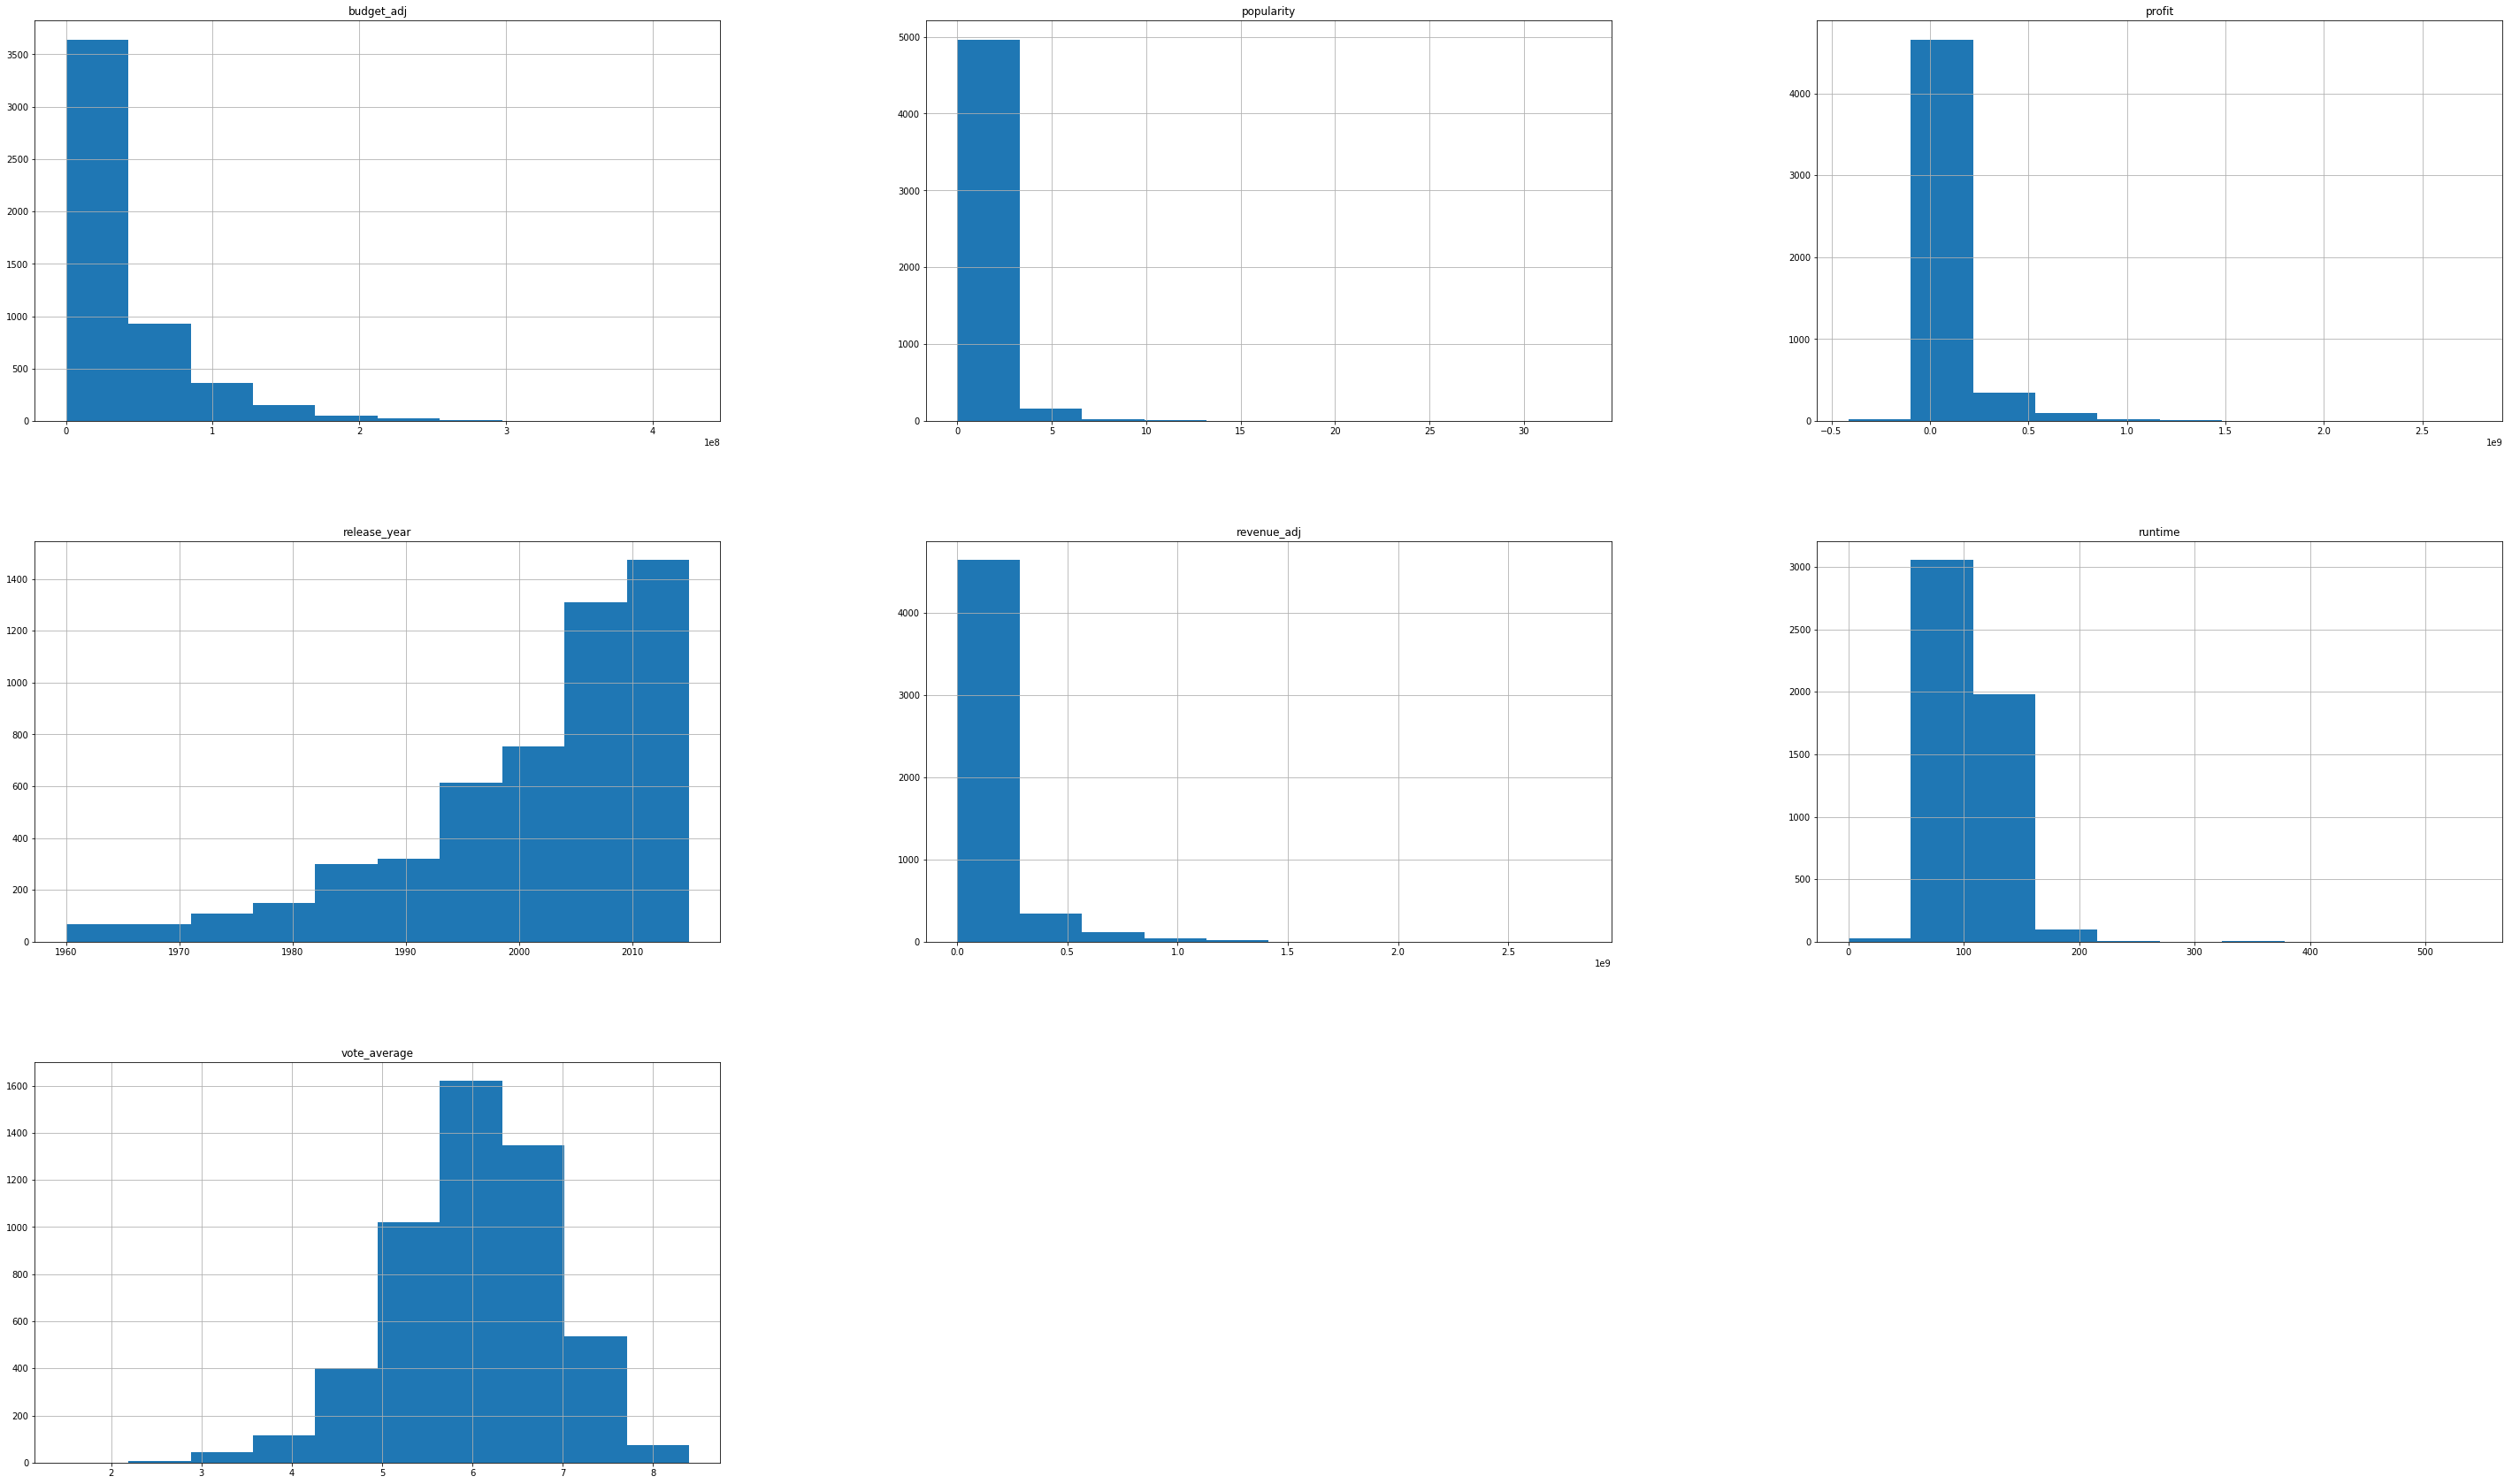

In [20]:
df.hist(figsize=(50,30));

create histograms of all categories 

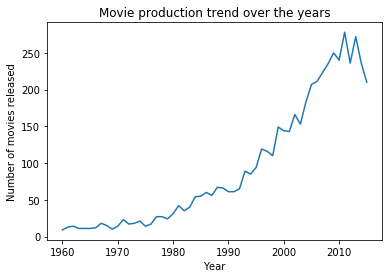

In [21]:
movies= df['release_year'].value_counts().sort_index();
plt.plot(movies);
plt.title('Movie production trend over the years');
plt.xlabel('Year');
plt.ylabel('Number of movies released');

Plot a line graph of amount of movies released over the years

In [22]:
movies.idxmax() , movies.idxmin()

(2011, 1960)

Min and max data points of movie release dates

In [23]:
movies.describe()

count     56.000000
mean      92.285714
std       85.112698
min        9.000000
25%       18.000000
50%       60.500000
75%      150.000000
max      278.000000
Name: release_year, dtype: float64

Meaningful statistics on movie release year

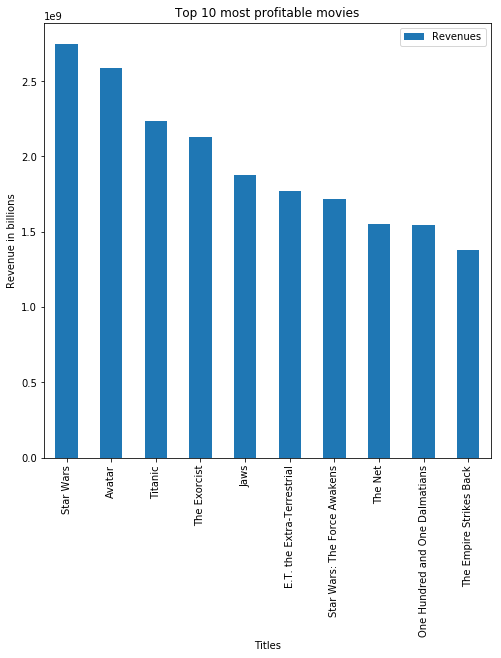

In [24]:
sorted_revenue = df['profit'].sort_values(ascending=False)[:10]

high_grossers=pd.DataFrame()
titles=[]
revenues=[]
for i in sorted_revenue.index:
    titles.append(df.loc[i,'original_title'])
    revenues.append(sorted_revenue.loc[i])
high_grossers['Titles']=titles
high_grossers['Revenues']=revenues
high_grossers.set_index('Titles',inplace=True)
high_grossers.plot(kind ='bar',figsize=(8,8))
plt.title('Top 10 most profitable movies');
plt.ylabel('Revenue in billions');

Create a bar chart displaying the top 10 most profitable movies

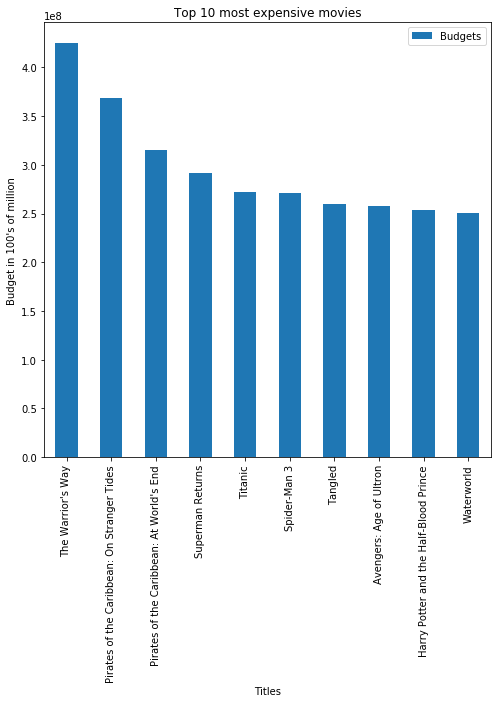

In [25]:
sorted_budget = df['budget_adj'].sort_values(ascending=False)[:10]
high_budget=pd.DataFrame()
titles_exp=[]
budgets=[]
for i in sorted_budget.index:
    titles_exp.append(df.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
high_budget['Titles']=titles_exp
high_budget['Budgets']=budgets
high_budget.set_index('Titles',inplace=True)
high_budget.plot(kind ='bar',figsize=(8,8))
plt.title('Top 10 most expensive movies');
plt.ylabel('Budget in 100\'s of million');

Create a bar chart on top 10 most expensive movies based on budget data

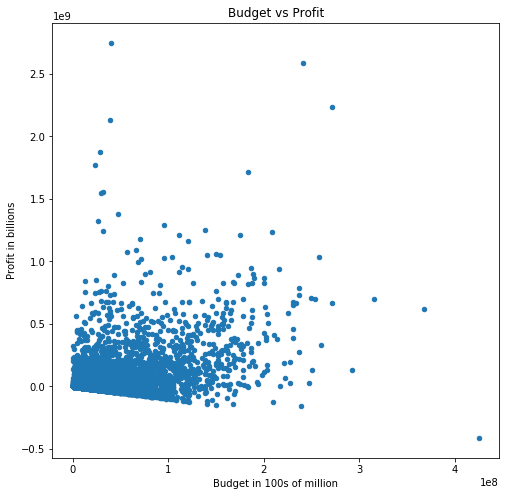

In [26]:
df.plot(x='budget_adj',y='profit',kind='scatter',figsize=(8,8));
plt.title('Budget vs Profit')
plt.xlabel('Budget in 100s of million');
plt.ylabel('Profit in billions');

Compare the relationship between profit and budget in a scatter plot

In [27]:
def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

Code for pearsons correlation coefficient 

In [28]:
correlation_coeff(df['budget_adj'],df['profit'])

0.42490932630904332

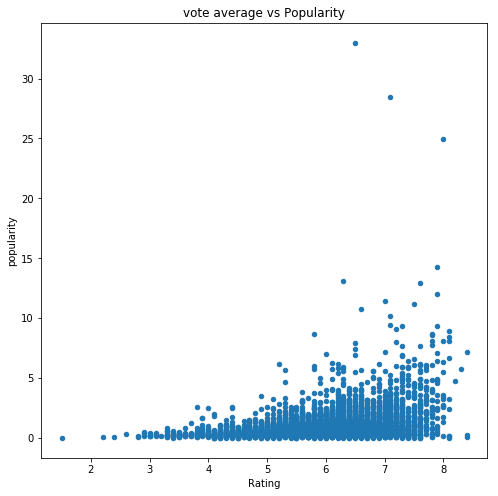

In [29]:
df.plot(x='vote_average',y='popularity',kind='scatter',figsize=(8,8));
plt.ylabel('popularity');
plt.xlabel('Rating');
plt.title('vote average vs Popularity');

In [30]:
correlation_coeff(df['vote_average'],df['popularity'])

0.31288303211890794

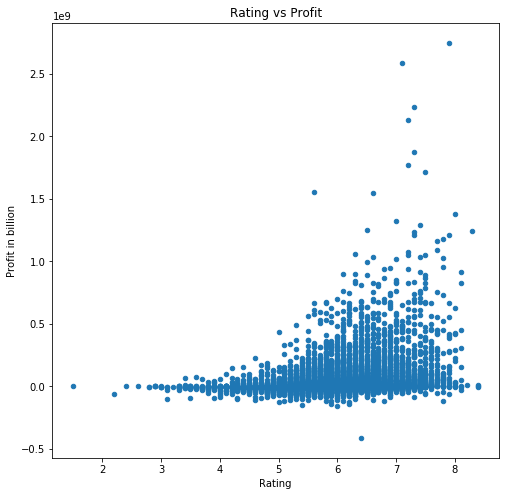

In [31]:
df.plot(x='vote_average',y='profit',kind='scatter',figsize=(8,8));
plt.ylabel('Profit in billion');
plt.xlabel('Rating');
plt.title('Rating vs Profit');

In [32]:
correlation_coeff(df['vote_average'],df['profit'])

0.28483837723978289

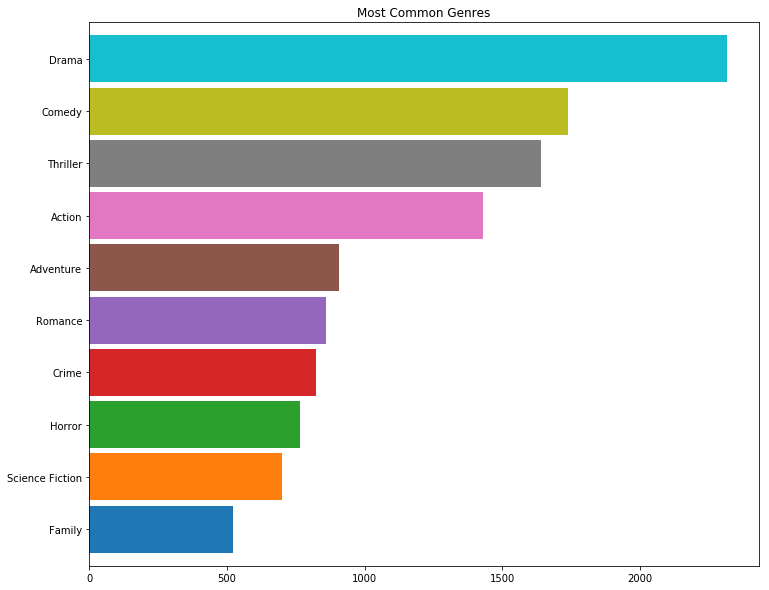

In [33]:
genresList = df['genres'].str.split('|')
genres = []
for i in genresList:
    genres.extend(i)
plt.subplots(figsize=(12,10))
pd.Series(genres).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9)
plt.title('Most Common Genres')
plt.show()

## Research Question 1 

### What are the most popular genres?

The 10 most popular genres in order from most popular to least popular include
1. Drama
2. Comedy
3. Thriller 
4. Action
5. Adventure
6. Romance
7. Crime
8. Horror
9. SciFI
10. Family

## Research Question 2  

### What are the most profitable movies?

The Top 10 most profitable movies from most profitable to less profitable include
1. Star Wars
2. Avatar
3. Titanic
4. The exorcist
5. Jaws
6. ET
7. Star Wars: Force Awakens
8. The Net
9. 101 Dalmatians
10. The Empire Strikes Back 

## Research Question 3

### What were the most expensive movies to create?

The Top 10 most expensive movies include
1. The Warrior's Way
2. Pirates of the Caribbean: Stranger Tides
3. Pirates of the Caribbean: At World's End
4. Superman Returns
5. Titanic
6. Spider-Man 3
7. Tangled
8. Avengers: Age of Ultron
9. Harry Potter and the Half Blood Priince
10. Waterworld

## Research Question 4

### Is there a relationship between profit and average vote rating?

Profit and vote average were graphed on a scatter plot. Correlation Coefficient of data was 0.28483837723978289 which is a very weak positive coefficient. There is some correlation, but it is too weak to be a substantial correlation.  

## Research Question 5

### How has number of releases changed over time?

The minimum number of releases happened in 1960 at 9 movie releases.
The maximum number of releases happened in 2011 at 278 movie releases.
The average number of releases over the years was 92 movies spanned over a 56 year period. 
The data trend showed an overall increase of movies released over time. 

<a id='conclusions'></a>
## Conclusions

This was a great project to test out analyzing data with Python.
Using jupyter Notebooks allowed me to go through the process of inserting the data set, cleaning the data set, displaying data, and analyzing trends in a very accurate way.

Being new to coding was a limitation however because I know I have missed more efficient ways of analyzing this dataset. I am hopeful to continue learning how to code efficiently for future projects. 

Although there was minor corelations between some of the data points analyzed, the correlations were not in a strong enough coefficient to suspect causation. 

A limitation of this data set that stuck out to me was that some movies had multiple genre listings. This made it so that each movie was not represented by just one genre, but multiple genres. Plus, even though a genre was common does not mean is was popular. A good future analysis could perhaps be analyzing genere with popularity.

Another limitation was the existance of Outliers. Outliers were present in multiple data sets and it would have been interested to know how to test how much the statistics would have changed with and without the outliers. 




## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0